## Introduction 

With accelarating climate change, news of wild fires have become very common. In this project we wanted to investigate the change in greenhouse gas emissions due to wild fire over last decade. We narrowed the scope of the project to look at the Savanna, grassland, and shrubland fires from South America. We employed GHG accounting here.

## Exploratory Data Analysis

The global wild fire emissions data was obtained from [Global Fire Emissions Data](https://www.globalfiredata.org/) version 4.1. For this project we used the dry matter emissions data over a period from 1997 to 2016. Here is a quick exploration of the DM emissions data: 

In [1]:
import numpy as np
import h5py
import sys
import matplotlib.pyplot as plt
import calendar
import pandas as pd
from matplotlib import colors, cm

In [2]:
directory    = '/Users/upasanasen/Downloads/GFED4/www.geo.vu.nl/~gwerf/GFED/GFED4'

Let's look at data for year 2010.

In [4]:
year = 2010

In [5]:
f = h5py.File(directory + f'/GFED4.1s_{year}.hdf5', 'r')

Looking at February 2010 emissions data.

In [6]:
DM_emissions = f['/emissions/02/DM'][:]

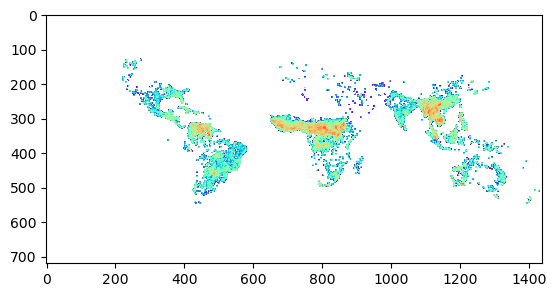

In [7]:
plt.imshow(DM_emissions , cmap=cm.rainbow, norm=colors.LogNorm())
plt.show()

A spatial resolution of 0.25 degrees is available in the data.

The DM emissions data is separated into 6 sources:
* SAVA (Savanna, grassland, and shrubland fires)
* BORF (Boreal forest fires)
* TEMF (Temperature forest fires)
* DEFO (Tropical forest fires - deforestation and degradation)
* PEAT (Peat fires)
* AGRI (Agricultural waste burning)

Here we select the forest fires from Savanna, grassland, and shrubland fires.    

In [8]:
contribution_SAVA = f['/emissions/02/partitioning/DM_SAVA'][:]

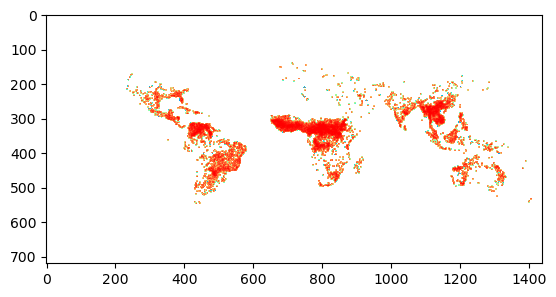

In [9]:
plt.imshow(contribution_SAVA , cmap=cm.rainbow, norm=colors.LogNorm())
plt.show()

In [10]:
basis_regions = f['/ancill/basis_regions'][:]

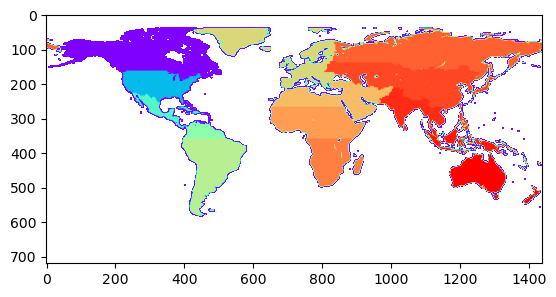

In [11]:
plt.imshow(basis_regions, cmap=cm.rainbow, norm=colors.LogNorm())
plt.show()

Only selecting the region covering South America.

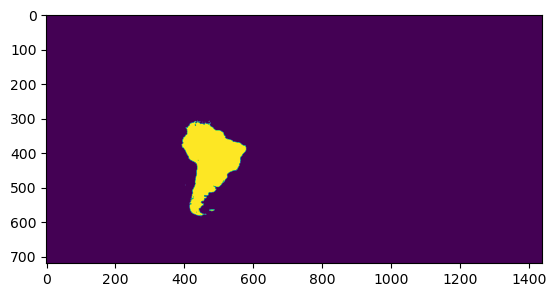

In [12]:
south_america_mask = (basis_regions==4) | (basis_regions==5)
plt.imshow(south_america_mask.astype(int))
plt.show()

In [13]:
grid_area = f['/ancill/grid_cell_area'][:]

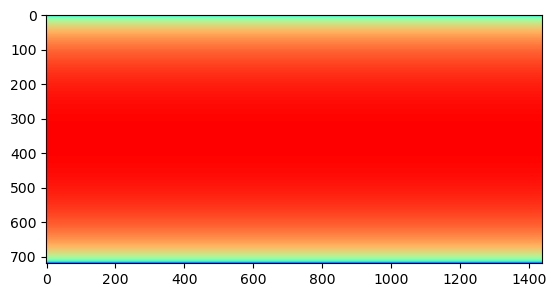

In [14]:
plt.imshow(grid_area, cmap=cm.rainbow, norm=colors.LogNorm())
plt.show()

## Extracting Dry Matter Data for Savannah in South America

Here we extract the dry matter emissions data for Savanna, grassland, and shrubland fires for the continent of South America over the period from 1997 through 2016. 

In [15]:
DM_SAVA_South_America = np.sum(grid_area * south_america_mask * DM_emissions * contribution_SAVA)
DM_SAVA_South_America

13959010000.0

We aggregate the DM emissions for the entire continent for out GHG accounting. 

In [16]:
### creating for all years from 1997-2016

start_year = 1997
end_year = 2016

DM_SAVA_South_America = []
for year in range(start_year, end_year+1):
    DM_SAVA_South_America.append([])
    f = h5py.File(directory + f'/GFED4.1s_{year}.hdf5', 'r')
    basis_regions = f['/ancill/basis_regions'][:]
    south_america_mask = (basis_regions==4) | (basis_regions==5)
    grid_area = f['/ancill/grid_cell_area'][:]
    for month in range(1, 13):
        month = f"0{month}"[-2:]
        ## dry matter world-wide
        DM_emissions = f[f'/emissions/{month}/DM'][:]
        ## SAVA contribution world-wide
        contribution_SAVA = f[f'/emissions/{month}/partitioning/DM_SAVA'][:]
        ### creating Dry Matter from Savannah in South America
        DM_SAVA_South_America[-1].append(
            np.sum(grid_area * south_america_mask * DM_emissions * contribution_SAVA)
        )
DM_SAVA_South_America = np.array(DM_SAVA_South_America)
DM_SAVA_South_America

array([[1.07564472e+10, 1.12795679e+10, 1.31613317e+10, 5.85500621e+09,
        4.93446349e+09, 3.83247078e+09, 3.15373834e+10, 1.63708502e+11,
        1.14328224e+11, 6.10001019e+10, 2.40187843e+10, 1.95779338e+10],
       [2.43370394e+10, 1.66070692e+10, 2.29313065e+10, 4.71031501e+09,
        3.53592576e+09, 1.24485048e+10, 4.26858865e+10, 1.55290321e+11,
        1.40196200e+11, 4.75809219e+10, 1.39173929e+10, 1.10200832e+10],
       [8.84242125e+09, 1.13719009e+10, 1.21075907e+10, 3.98496742e+09,
        6.82695526e+09, 7.81404979e+09, 3.59493837e+10, 1.81036171e+11,
        1.12393953e+11, 4.62456545e+10, 1.79637391e+10, 1.40932946e+10],
       [1.90436106e+10, 3.05566228e+10, 1.16720486e+10, 4.63011686e+09,
        4.96384614e+09, 1.26148659e+10, 1.52798218e+10, 3.36148787e+10,
        5.41593723e+10, 2.68407665e+10, 6.09394586e+09, 1.44529326e+10],
       [1.96409651e+10, 1.74623744e+10, 1.75155364e+10, 9.44802509e+09,
        5.85813811e+09, 6.61616026e+09, 2.67543020e+10, 1.03

In [19]:
DM_SAVA_South_America_df = pd.DataFrame(DM_SAVA_South_America, columns = [calendar.month_name[month] for month in range(1,13)])
DM_SAVA_South_America_df['year'] = [year for year in range(start_year, end_year+1)]
DM_SAVA_South_America_df.set_index('year', inplace=True)
DM_SAVA_South_America_df

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1997,1.075645e+10,1.127957e+10,1.316133e+10,5.855006e+09,4.934463e+09,3.832471e+09,3.153738e+10,1.637085e+11,1.143282e+11,6.100010e+10,2.401878e+10,1.957793e+10
1998,2.433704e+10,1.660707e+10,2.293131e+10,4.710315e+09,3.535926e+09,1.244850e+10,4.268589e+10,1.552903e+11,1.401962e+11,4.758092e+10,1.391739e+10,1.102008e+10
1999,8.842421e+09,1.137190e+10,1.210759e+10,3.984967e+09,6.826955e+09,7.814050e+09,3.594938e+10,1.810362e+11,1.123940e+11,4.624565e+10,1.796374e+10,1.409329e+10
2000,1.904361e+10,3.055662e+10,1.167205e+10,4.630117e+09,4.963846e+09,1.261487e+10,1.527982e+10,3.361488e+10,5.415937e+10,2.684077e+10,6.093946e+09,1.445293e+10
2001,1.964097e+10,1.746237e+10,1.751554e+10,9.448025e+09,5.858138e+09,6.616160e+09,2.675430e+10,1.032542e+11,6.733840e+10,2.728500e+10,1.127693e+10,7.891724e+09
2002,1.449080e+10,1.482942e+10,9.659420e+09,6.577133e+09,7.240868e+09,1.585143e+10,3.310469e+10,1.084434e+11,8.707520e+10,7.176641e+10,3.493778e+10,1.599063e+10
2003,2.357067e+10,2.081050e+10,2.206998e+10,1.012094e+10,7.232364e+09,1.316158e+10,3.878994e+10,7.415013e+10,7.643884e+10,3.229389e+10,1.803181e+10,9.958977e+09
2004,1.670795e+10,2.125695e+10,1.419847e+10,4.992653e+09,5.225683e+09,1.420676e+10,2.730935e+10,8.465002e+10,1.286285e+11,3.962837e+10,2.140223e+10,1.768571e+10
2005,9.949259e+09,1.215128e+10,2.105866e+10,5.767137e+09,4.816633e+09,7.926750e+09,3.213951e+10,1.147711e+11,1.149994e+11,5.089697e+10,1.915611e+10,9.768927e+09


We convert the above extracted DM emissions data into MS Excel format so that we could do the GHG accounting in MS Excel. 

In [ ]:
DM_SAVA_South_America_df.to_excel('DM_SAVA_South_America_df.xlsx')

We have assumed zero emission factors for fluorinated greenhouse gases for this project.

In [21]:
## get the emmision factor of GHG gasses for SAVA

f = open(directory+'/ancill/GFED4_Emission_Factors.txt')
EFs     = np.zeros((41, 6)) # 41 species, 6 sources
line = f.readline()
k = 0
Gas_names = []
while line != "":
    if line[0] != "#":
        contents = line.split()
        EFs[k,:] = contents[1:]
        Gas_names.append(contents[0])
        k += 1
    line = f.readline()

f.close()

In [22]:
EFs.shape

(41, 6)

In [23]:
np.array(Gas_names)[[2,4,8]]

array(['CO2', 'CH4', 'N2O'], dtype='<U14')

In [24]:
efs_non_flouroghgs = dict(zip(np.array(Gas_names)[[2,4,8]], EFs[[2,4,8], 0]))
efs_non_flouroghgs

{'CO2': 1686.0, 'CH4': 1.94, 'N2O': 0.2}

The GWP values for the greenhouse gasses were taken from [here](https://climatechangeconnection.org/emissions/co2-equivalents/)

In [119]:
gwp = {'CO2': 1, 'CH4': 25, 'N2O': 298}

## GHG Accounting

The GHG accounting for yearly Savannah wild fire emissions (done in excel) is below:  

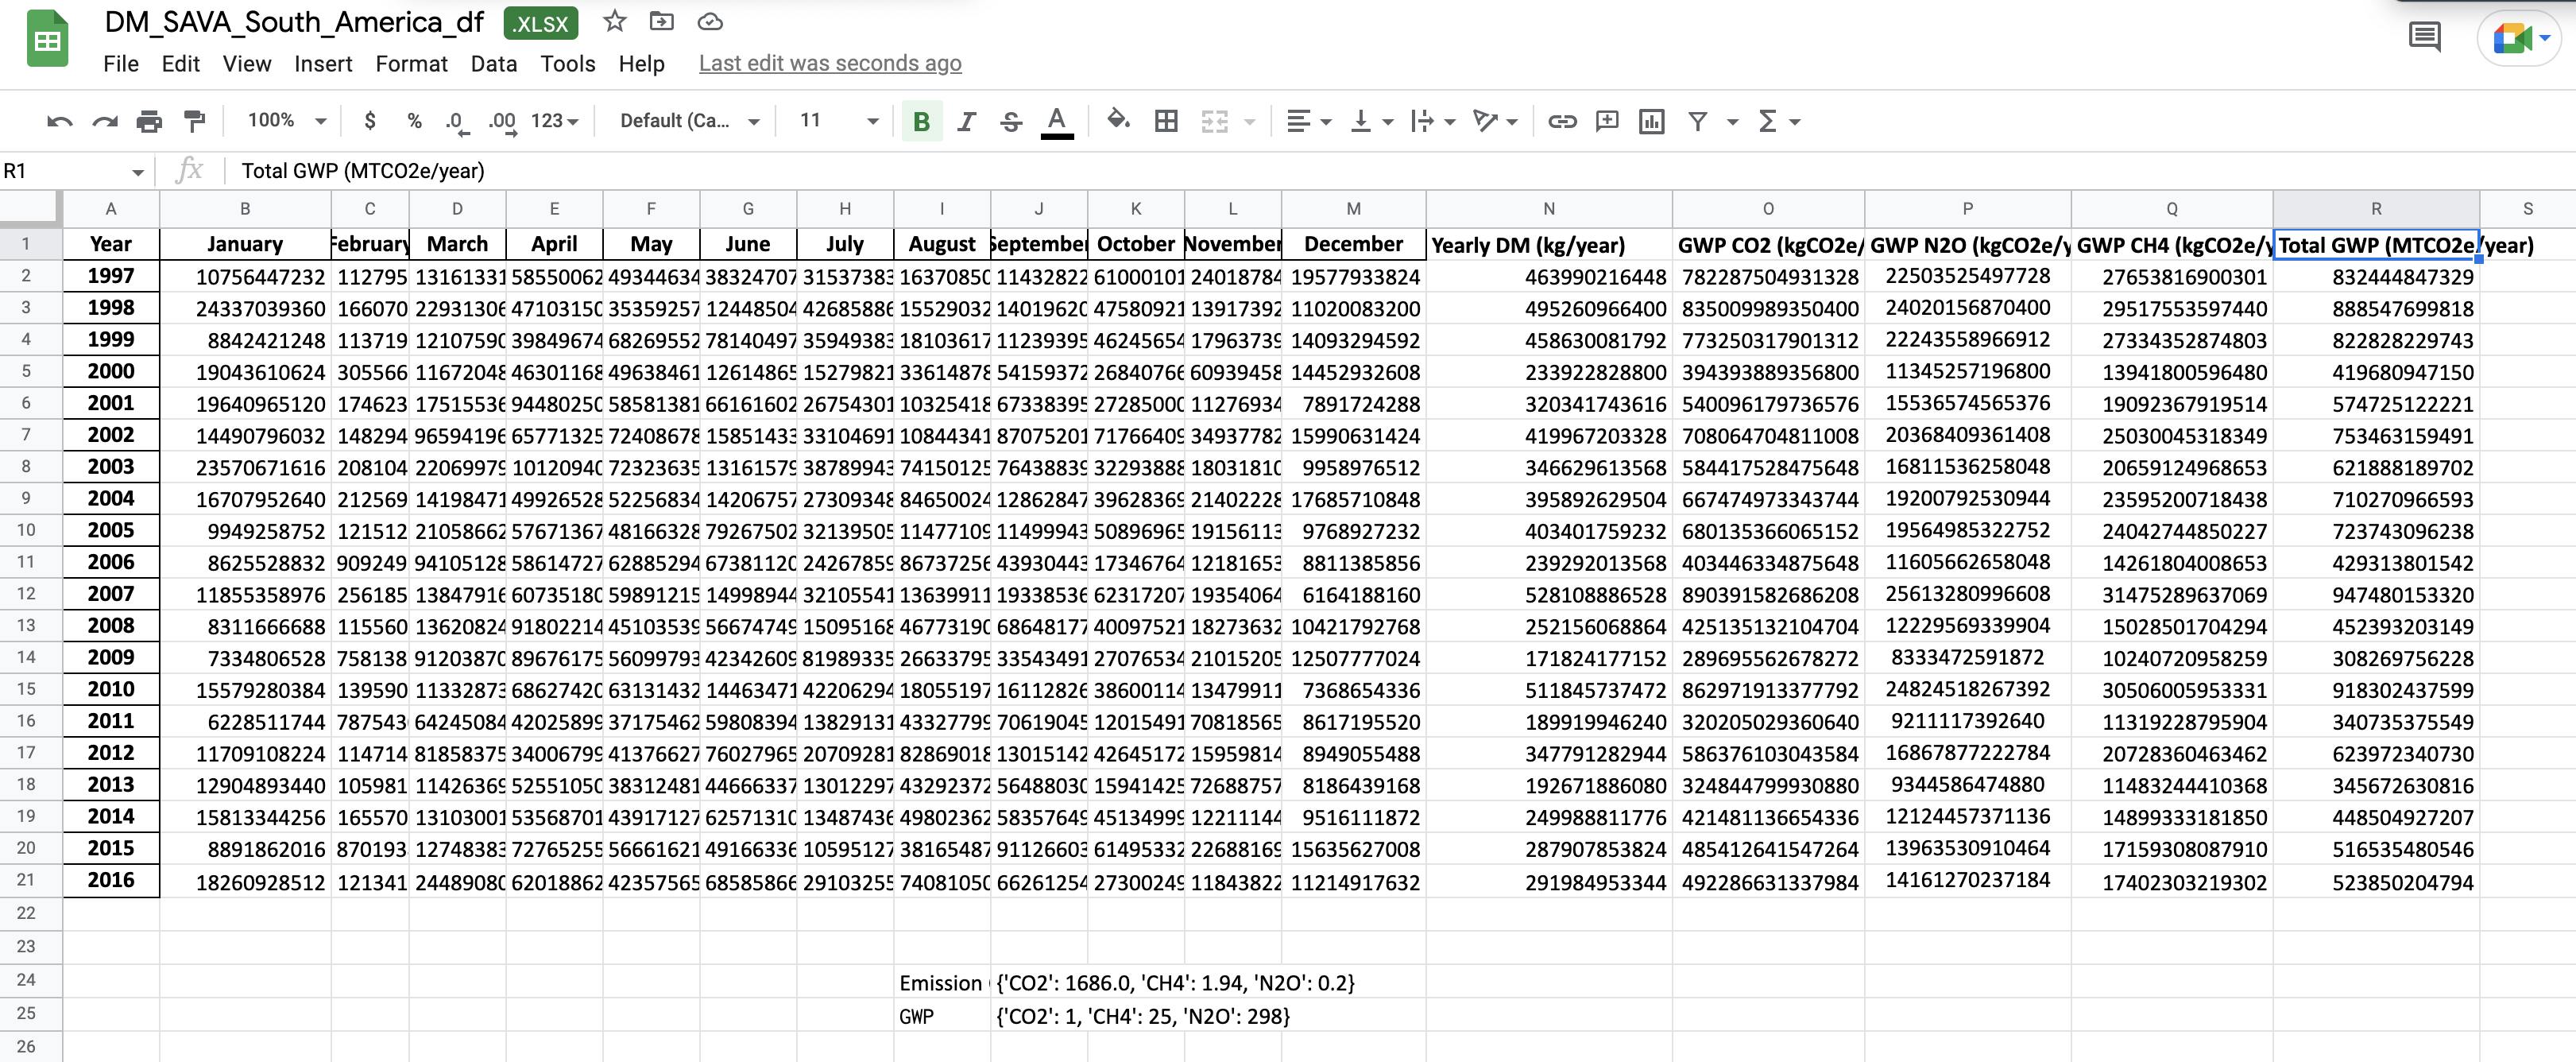

The GHG accounting for monthly Savannah wild fire emissions (done in excel) is below:

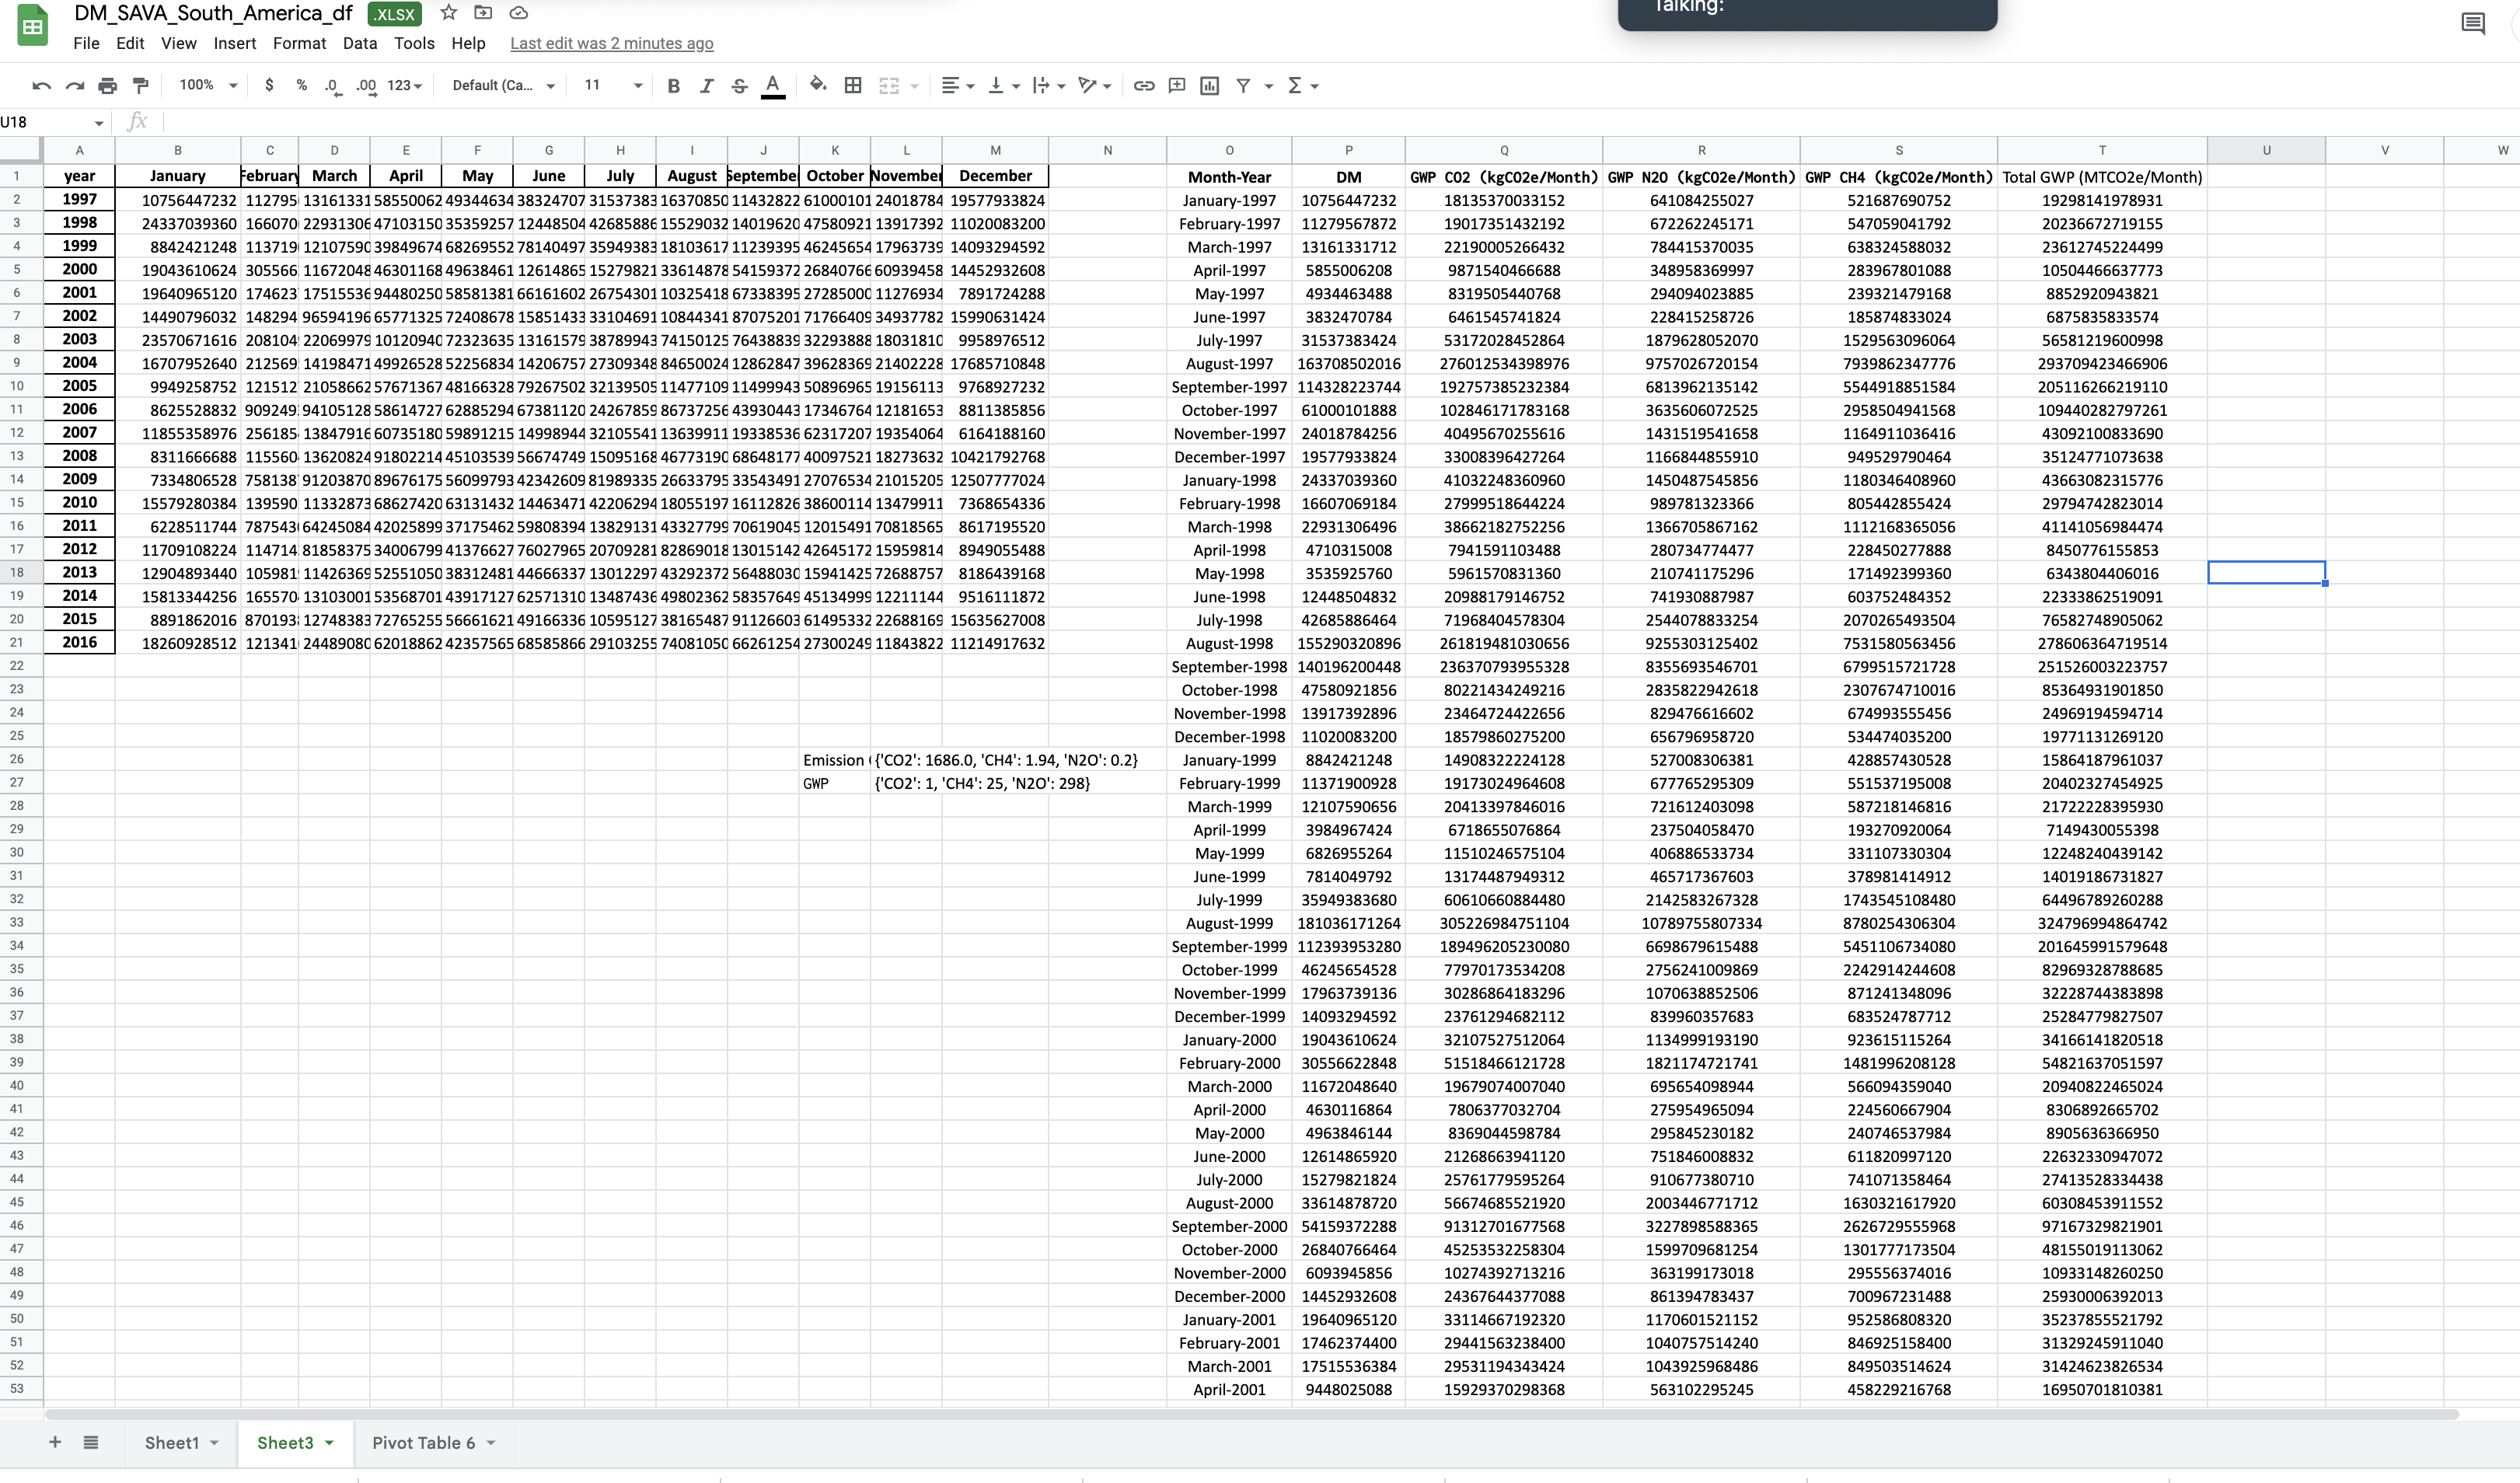

### GHG Emission over Time

We look at the greenhouse gas emissions for Savannah wild fire DM over the period 1997 to 2016

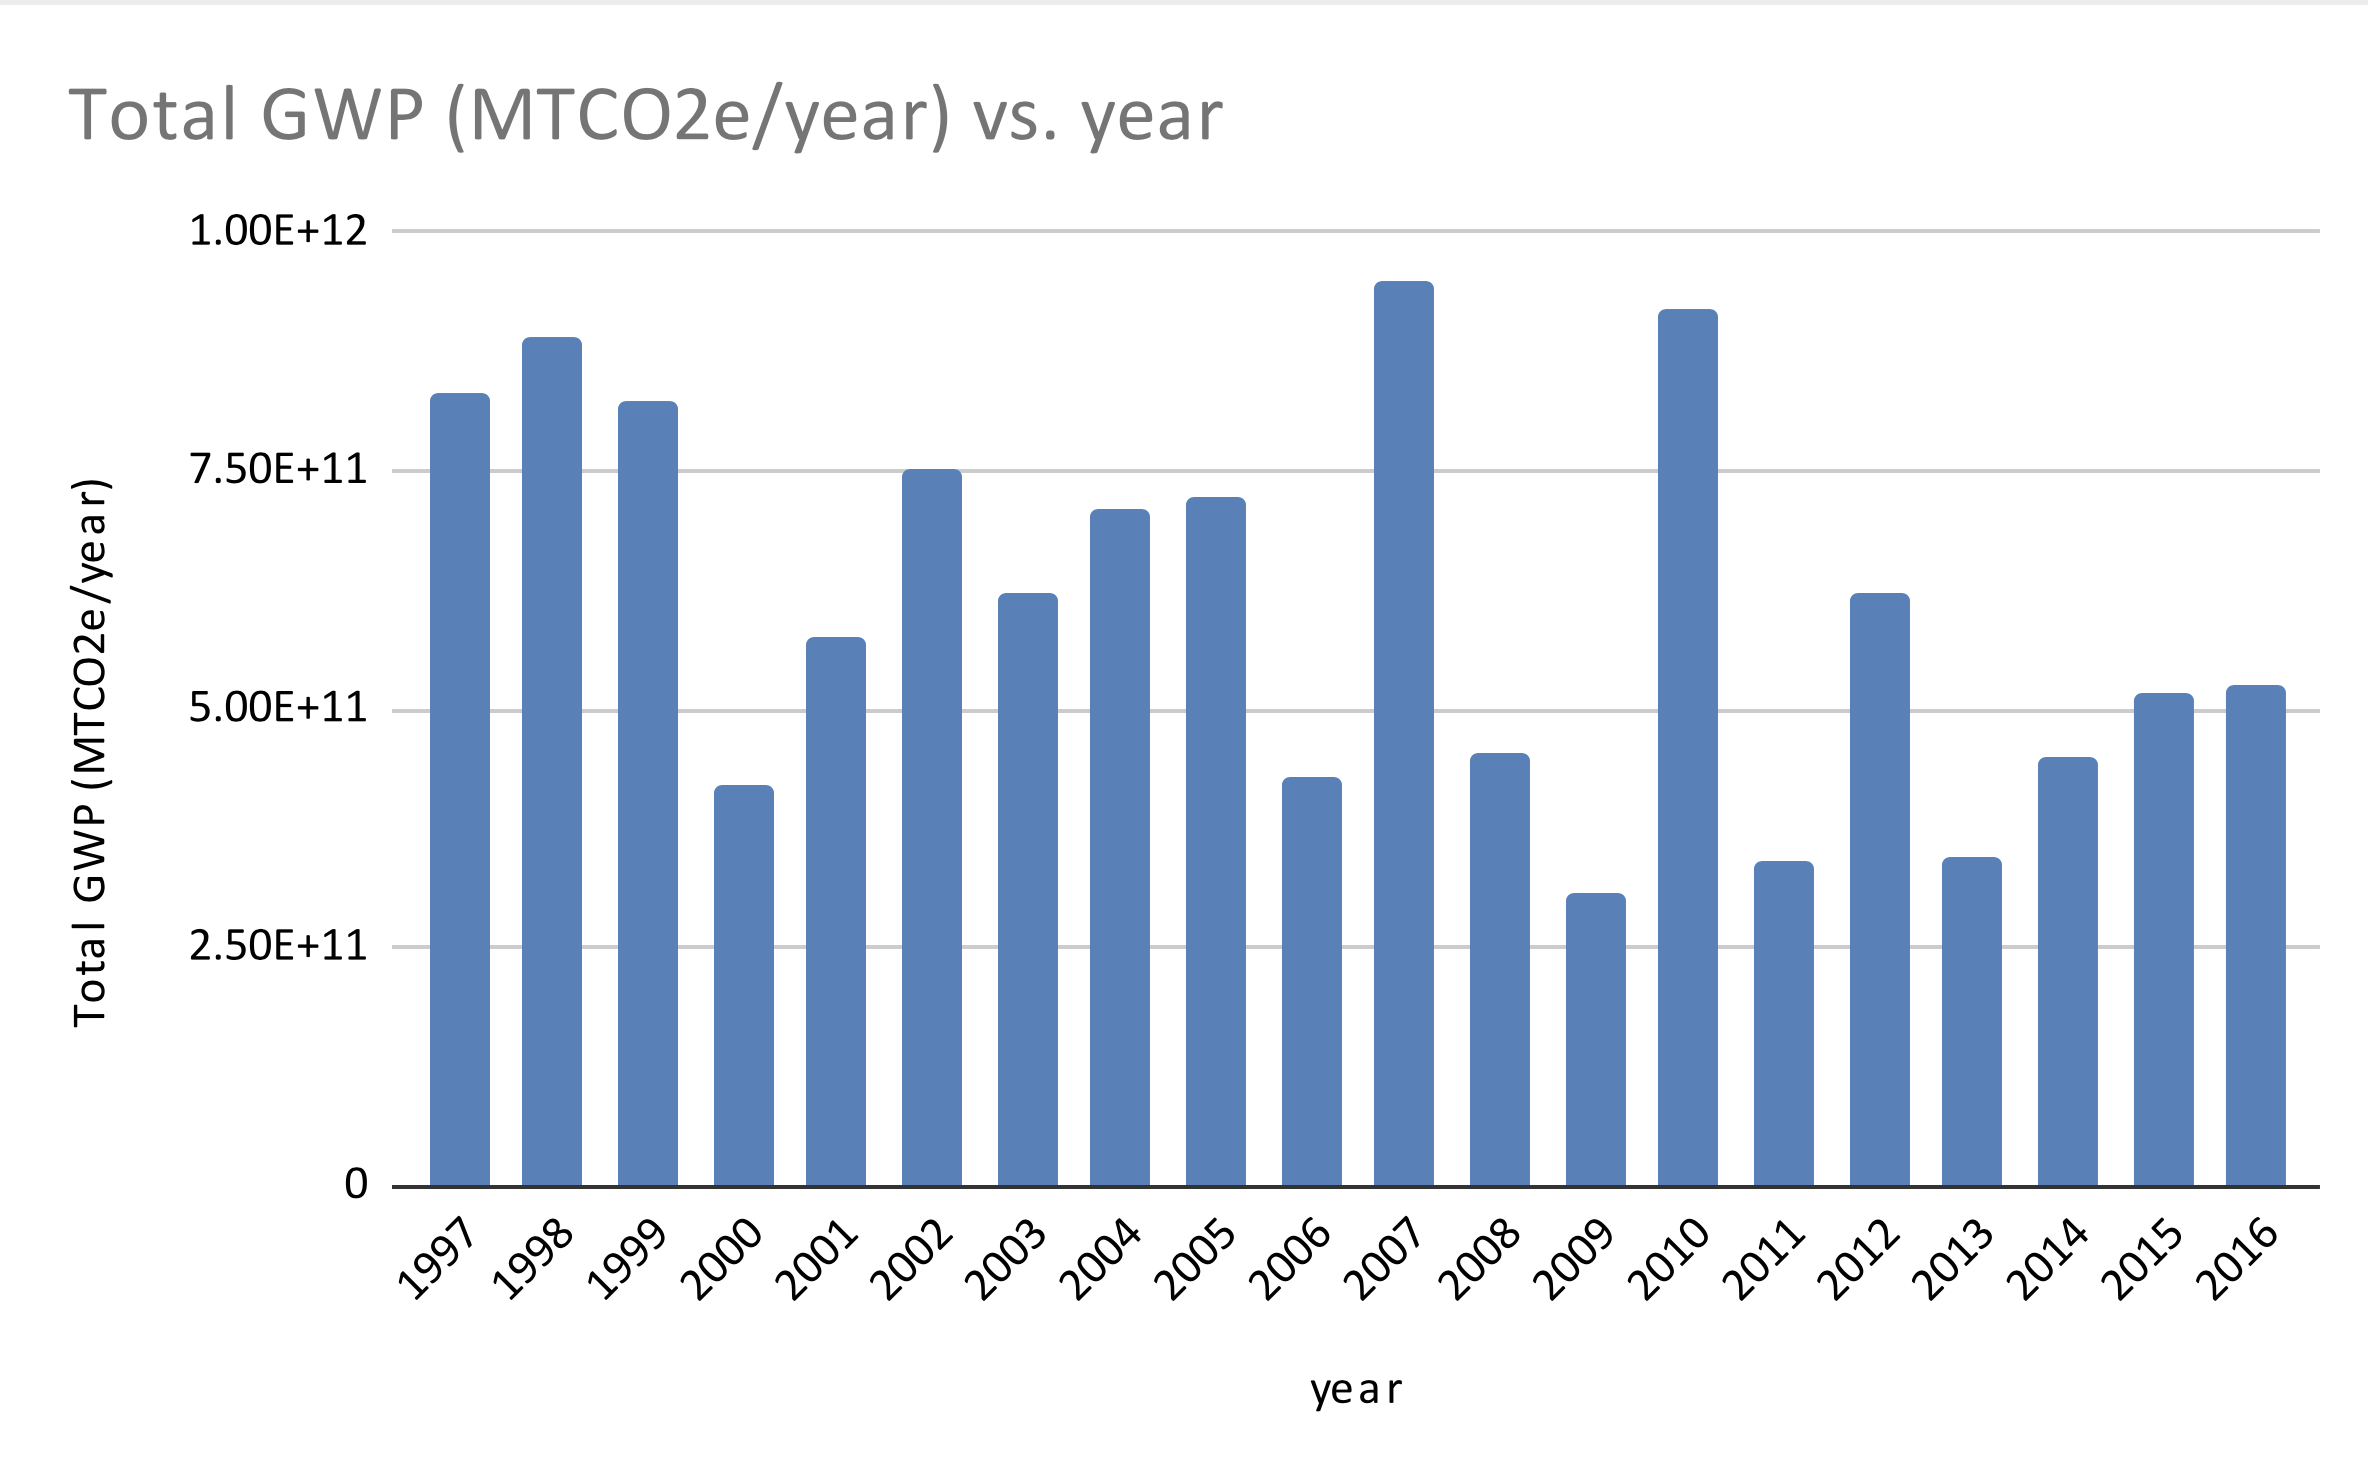

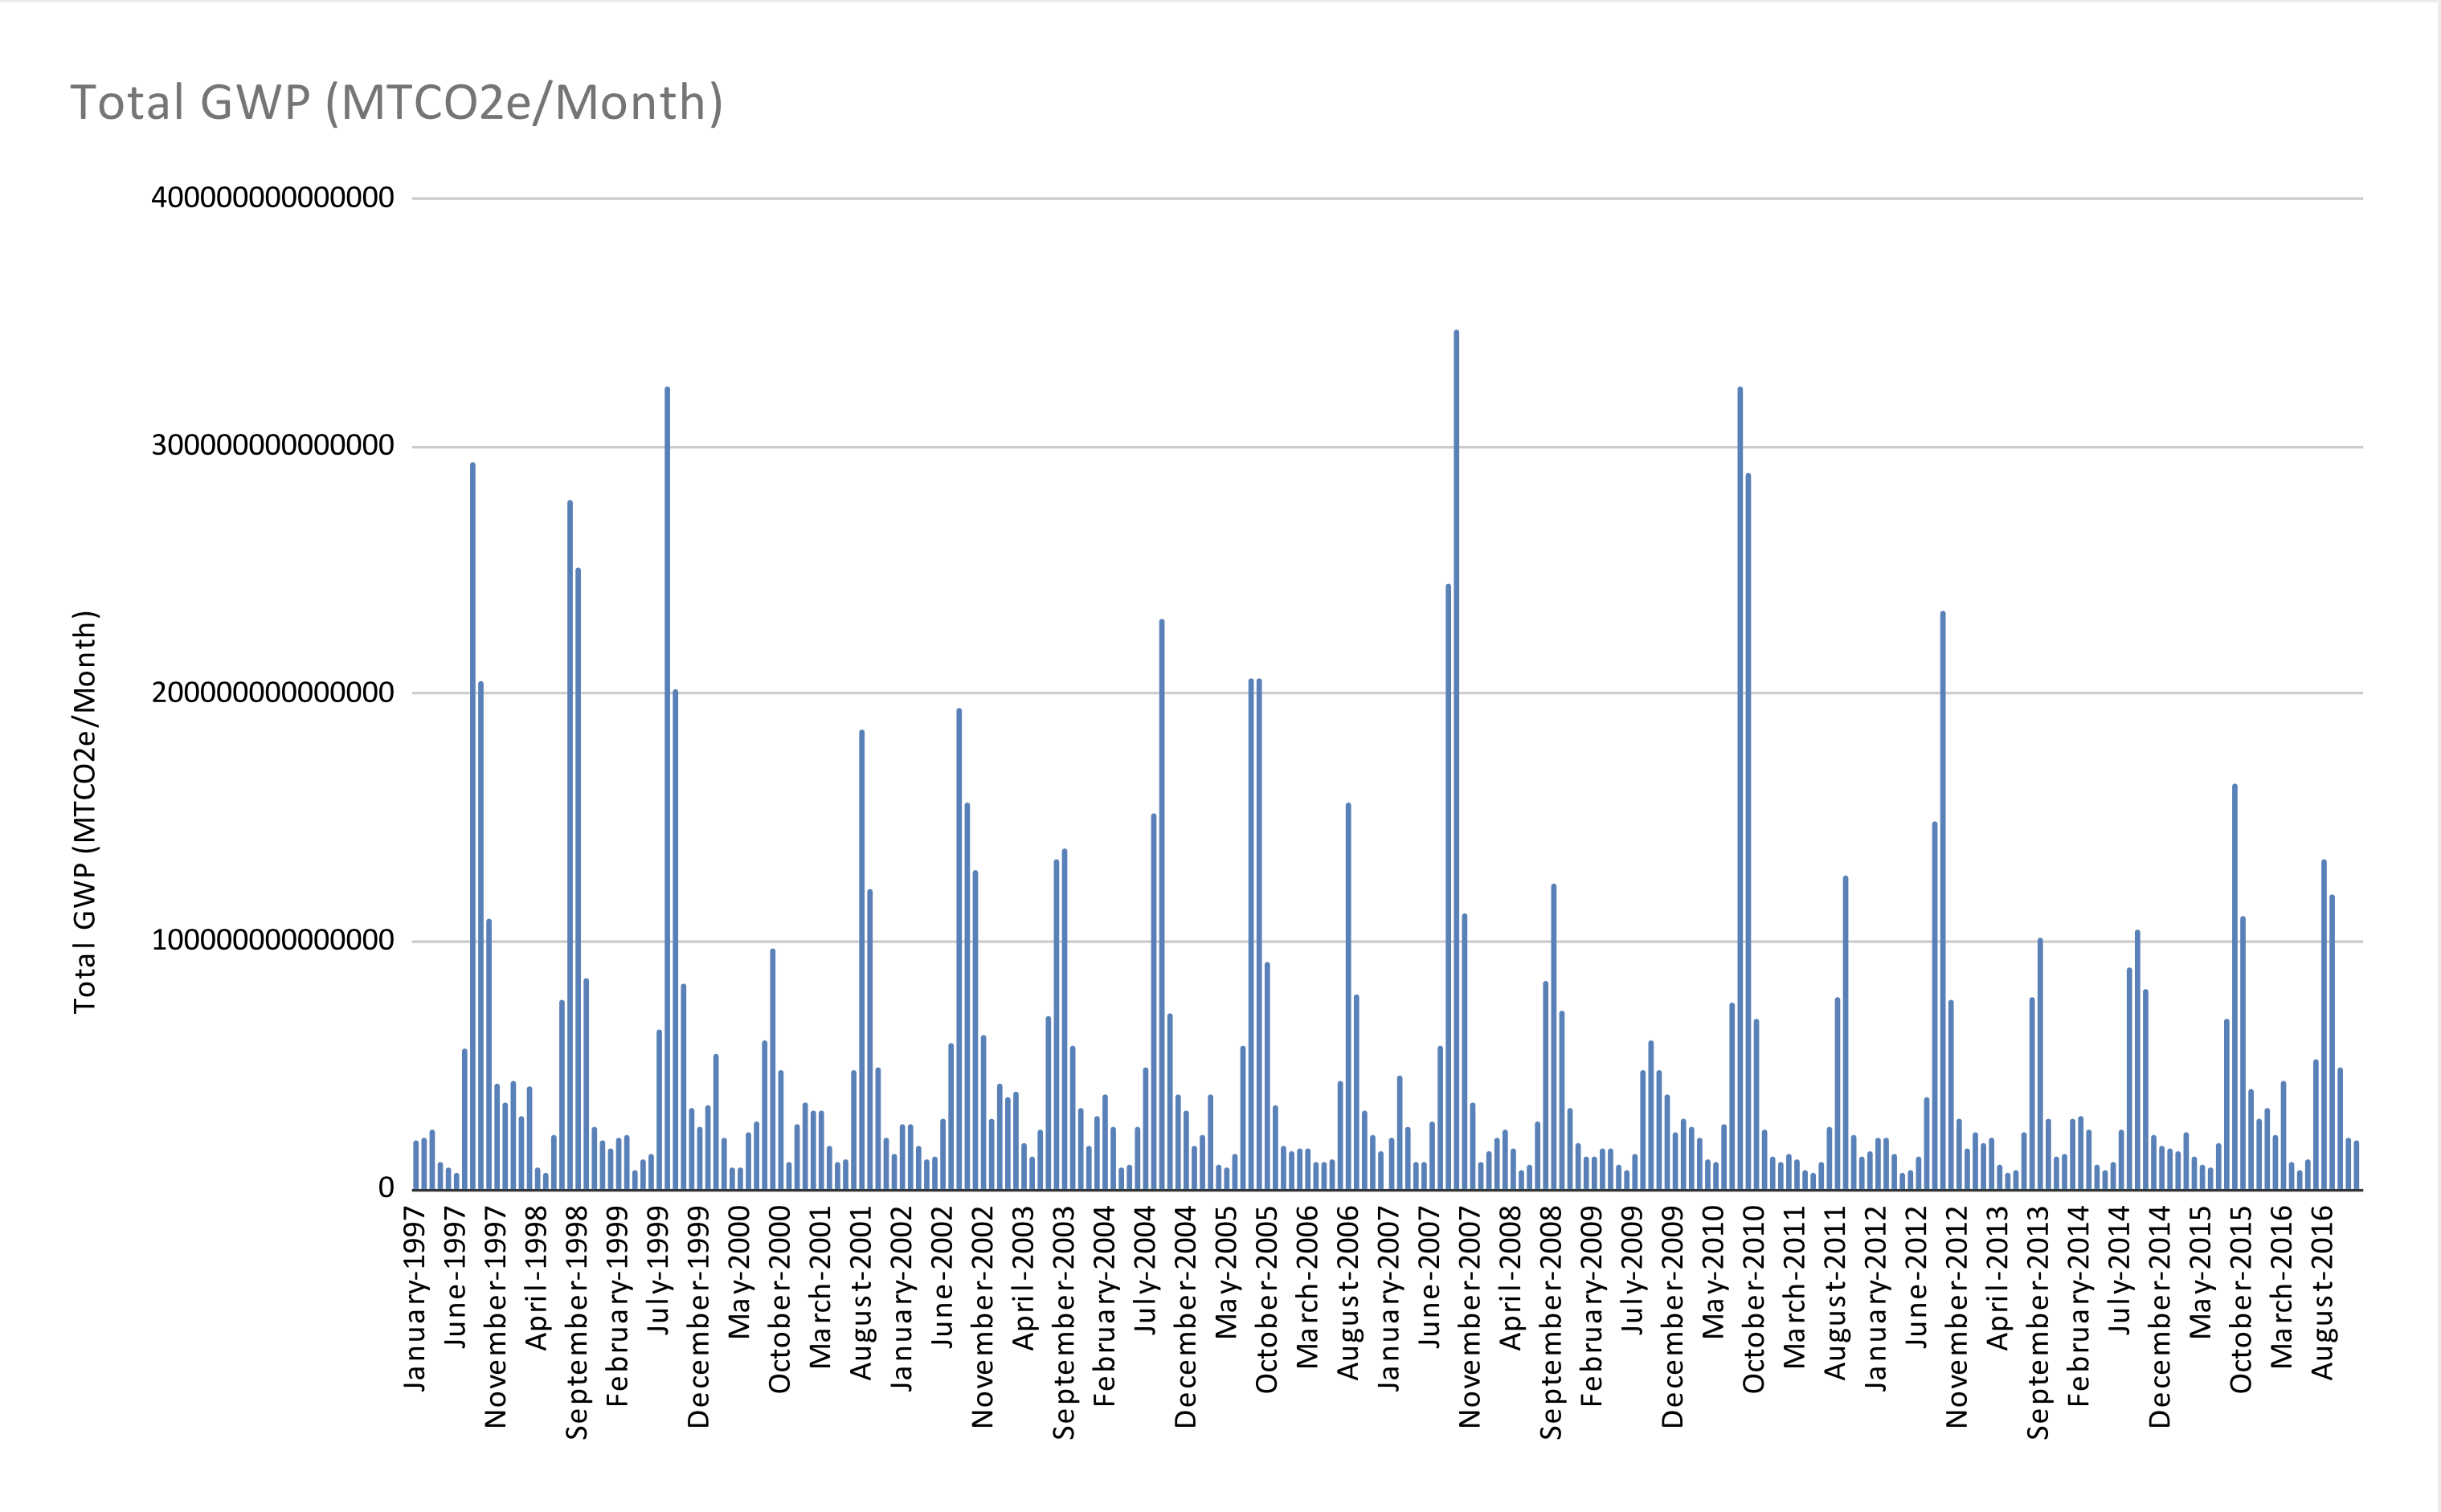